In [1]:
from openff.toolkit.topology import Molecule
import qcengine
from qcelemental.models import AtomicInput, OptimizationInput
from qcelemental.models.common_models import Model
from qcelemental.models.procedures import QCInputSpecification

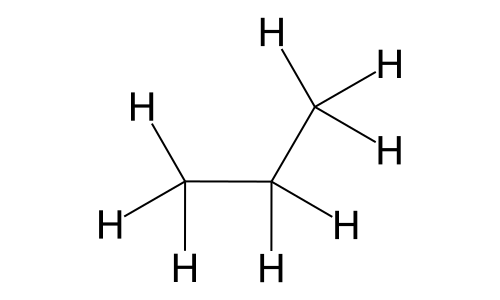

In [4]:
mol = Molecule.from_smiles("CCC")
mol.generate_conformers(n_conformers=1)
mol.visualize("rdkit")

In [5]:
qcel_mol = mol.to_qcschema()
qcel_mol.dict()

{'schema_name': 'qcschema_molecule',
 'schema_version': 2,
 'validated': True,
 'symbols': array(['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
 'geometry': array([[ 2.29848801, -0.45910588,  0.4002285 ],
        [ 0.07003991,  1.2543373 , -0.12218767],
        [-2.29068092, -0.35767834, -0.38770454],
        [ 1.59886993, -2.42010654,  0.8535708 ],
        [ 3.58240142, -0.65088498, -1.20898496],
        [ 3.22220326,  0.19860749,  2.16284195],
        [-0.27539602,  2.62148252,  1.4412282 ],
        [ 0.46275112,  2.35562944, -1.85017942],
        [-2.9804508 , -0.4610761 , -2.3463816 ],
        [-1.85570072, -2.35535096,  0.17702883],
        [-3.83252518,  0.27414605,  0.88053992]]),
 'name': 'C3H8',
 'molecular_charge': 0.0,
 'molecular_multiplicity': 1,
 'connectivity': [(0, 1, 1.0),
  (0, 3, 1.0),
  (0, 4, 1.0),
  (0, 5, 1.0),
  (1, 2, 1.0),
  (1, 6, 1.0),
  (1, 7, 1.0),
  (2, 8, 1.0),
  (2, 9, 1.0),
  (2, 10, 1.0)],
 'fix_com': False,
 'fix_orientation':

In [6]:
mace_model = Model(method="MACE_SPICE_larger.model", basis=None)
ani_model = Model(method="ani2x", basis=None)

In [7]:
qc_task = AtomicInput(molecule=qcel_mol, driver="energy", model=mace_model)
qc_task

AtomicInput(driver='energy', model={'method': 'MACE_SPICE_larger.model', 'basis': None}, molecule_hash='26538b8')

In [8]:
# compute the energy
result = qcengine.compute(input_data=qc_task, program="mace")

In [9]:
result.dict()

{'id': None,
 'schema_name': 'qcschema_output',
 'schema_version': 1,
 'molecule': {'schema_name': 'qcschema_molecule',
  'schema_version': 2,
  'validated': True,
  'symbols': array(['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
  'geometry': array([[ 2.29848801, -0.45910588,  0.4002285 ],
         [ 0.07003991,  1.2543373 , -0.12218767],
         [-2.29068092, -0.35767834, -0.38770454],
         [ 1.59886993, -2.42010654,  0.8535708 ],
         [ 3.58240142, -0.65088498, -1.20898496],
         [ 3.22220326,  0.19860749,  2.16284195],
         [-0.27539602,  2.62148252,  1.4412282 ],
         [ 0.46275112,  2.35562944, -1.85017942],
         [-2.9804508 , -0.4610761 , -2.3463816 ],
         [-1.85570072, -2.35535096,  0.17702883],
         [-3.83252518,  0.27414605,  0.88053992]]),
  'name': 'C3H8',
  'molecular_charge': 0.0,
  'molecular_multiplicity': 1,
  'connectivity': [(0, 1, 1.0),
   (0, 3, 1.0),
   (0, 4, 1.0),
   (0, 5, 1.0),
   (1, 2, 1.0),
   (1, 6, 

In [10]:
ani_task = AtomicInput(molecule=qcel_mol, driver="energy", model=ani_model)

In [11]:
ani_result = qcengine.compute(input_data=ani_task, program="torchani")

/Users/joshuahorton/mambaforge/envs/mace/lib/python3.9/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")


/Users/joshuahorton/mambaforge/envs/mace/lib/python3.9/site-packages/torchani/resources/


/Users/joshuahorton/mambaforge/envs/mace/lib/python3.9/site-packages/torchani/aev.py:249: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pair_sizes = counts * (counts - 1) // 2


In [12]:
ani_result.dict()

{'id': None,
 'schema_name': 'qcschema_output',
 'schema_version': 1,
 'molecule': {'schema_name': 'qcschema_molecule',
  'schema_version': 2,
  'validated': True,
  'symbols': array(['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
  'geometry': array([[ 2.29848801, -0.45910588,  0.4002285 ],
         [ 0.07003991,  1.2543373 , -0.12218767],
         [-2.29068092, -0.35767834, -0.38770454],
         [ 1.59886993, -2.42010654,  0.8535708 ],
         [ 3.58240142, -0.65088498, -1.20898496],
         [ 3.22220326,  0.19860749,  2.16284195],
         [-0.27539602,  2.62148252,  1.4412282 ],
         [ 0.46275112,  2.35562944, -1.85017942],
         [-2.9804508 , -0.4610761 , -2.3463816 ],
         [-1.85570072, -2.35535096,  0.17702883],
         [-3.83252518,  0.27414605,  0.88053992]]),
  'name': 'C3H8',
  'molecular_charge': 0.0,
  'molecular_multiplicity': 1,
  'connectivity': [(0, 1, 1.0),
   (0, 3, 1.0),
   (0, 4, 1.0),
   (0, 5, 1.0),
   (1, 2, 1.0),
   (1, 6, 

In [13]:
geometric_input = OptimizationInput(initial_molecule=qcel_mol, input_specification=QCInputSpecification(model=mace_model), keywords={"coordsys": "dlc", "maxiter": 300, "program": "mace"})
geometric_input

OptimizationInput(model={'method': 'MACE_SPICE_larger.model', 'basis': None}, molecule_hash='26538b8')

In [14]:
opt_result = qcengine.compute_procedure(input_data=geometric_input, procedure="geometric")

In [15]:
len(opt_result.trajectory)

22

In [16]:
opt_result.trajectory[-1].dict()

{'id': None,
 'schema_name': 'qcschema_output',
 'schema_version': 1,
 'molecule': {'schema_name': 'qcschema_molecule',
  'schema_version': 2,
  'validated': True,
  'symbols': array(['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
  'geometry': array([[ 2.368982871993401 , -0.4505075526288767,  0.3065637570197947],
         [-0.0449444053837429,  1.1194370384334245,  0.3419312998971855],
         [-2.3357879229361282, -0.3751588973266068, -0.5587721885396059],
         [ 2.1878393711372834, -2.1014481603465045,  1.5256839434978682],
         [ 2.777011207367034 , -1.1246204576734962, -1.59707758184069  ],
         [ 3.9931887832270863,  0.635527332497145 ,  0.9527193829733335],
         [-0.3853803588686323,  1.8167279992069145,  2.2524762132411187],
         [ 0.200445769473034 ,  2.786819325614363 , -0.8463242852244456],
         [-2.0612101753443257, -1.0467926310407667, -2.4870408214576774],
         [-2.650872552300327 , -2.024100468604175 ,  0.6355658776153

In [17]:
from openmm import unit
mol._conformers=[]
for result in opt_result.trajectory:
    mol.add_conformer(result.molecule.geometry * unit.bohr)

In [18]:
mol.to_file("mol.xyz", "xyz")

In [19]:
ani_geo_input = OptimizationInput(initial_molecule=qcel_mol, input_specification=QCInputSpecification(model=ani_model), keywords={"coordsys": "dlc", "maxiter": 300, "program": "torchani"})
ani_geo_input



OptimizationInput(model={'method': 'ani2x', 'basis': None}, molecule_hash='26538b8')

In [20]:
ani_result = qcengine.compute_procedure(input_data=ani_geo_input, procedure="geometric")

In [21]:
len(ani_result.trajectory)

168